In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

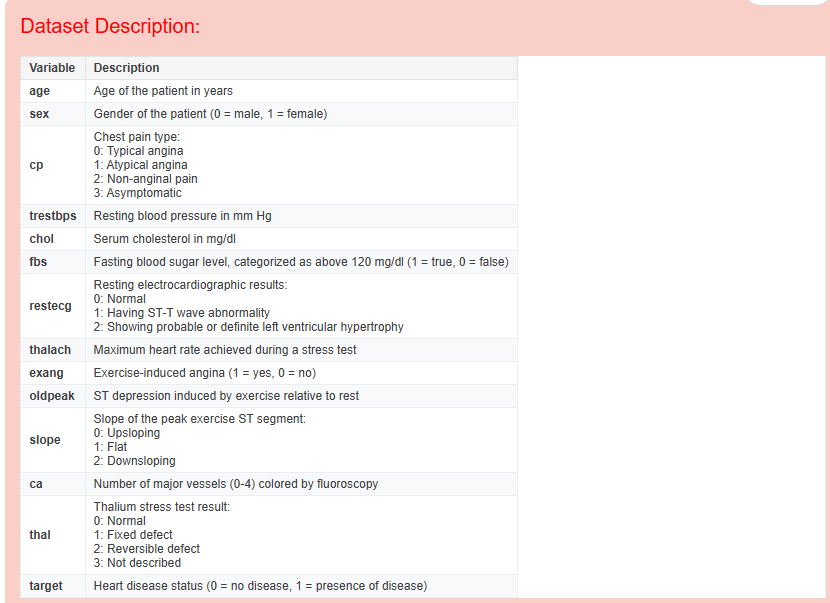

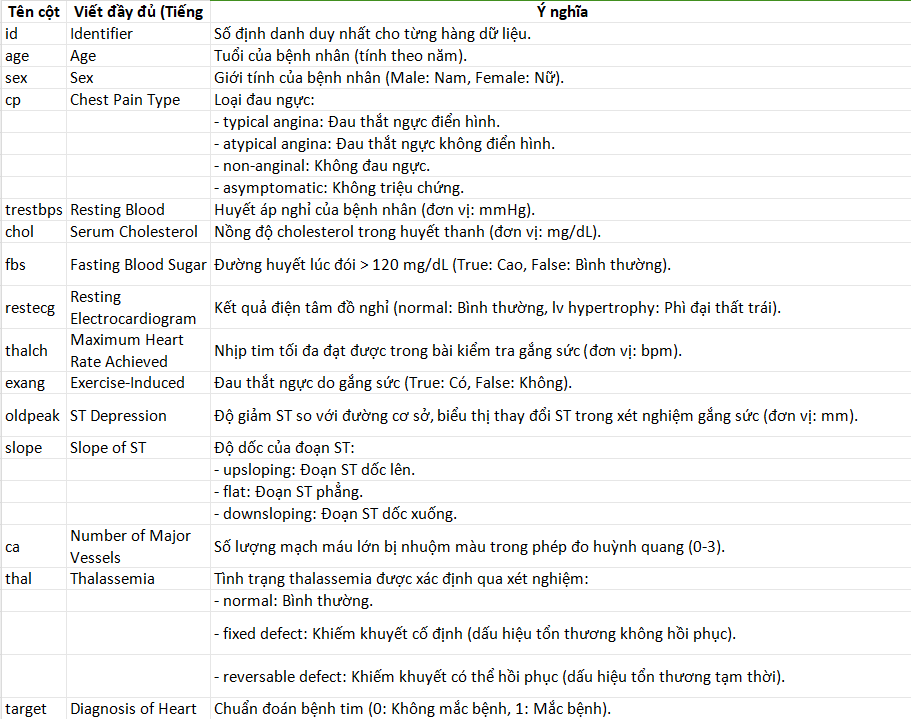

### Mô tả dữ liệu

In [2]:
df_heart = pd.read_csv('heart_disease.csv')
df_heart = df_heart.drop(columns='id')
df_heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,target
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,1
2,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [3]:
df_heart.select_dtypes(include=('int64', 'float64')).head()

,age,trestbps,chol,thalch,oldpeak,ca,target
0,63,145.0,233.0,150.0,2.3,0.0,0
1,67,160.0,286.0,108.0,1.5,3.0,1
2,67,120.0,229.0,129.0,2.6,2.0,1
3,37,130.0,250.0,187.0,3.5,0.0,0
4,41,130.0,204.0,172.0,1.4,0.0,0


In [4]:
df_heart.select_dtypes(include=('object')).head()

,sex,cp,fbs,restecg,exang,slope,thal
0,Male,typical angina,True,lv hypertrophy,False,downsloping,fixed defect
1,Male,asymptomatic,False,lv hypertrophy,True,flat,normal
2,Male,asymptomatic,False,lv hypertrophy,True,flat,reversable defect
3,Male,non-anginal,False,normal,False,downsloping,normal
4,Female,atypical angina,False,lv hypertrophy,False,upsloping,normal


In [5]:
df_heart.describe()

,age,trestbps,chol,thalch,oldpeak,ca,target
count,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.553261
std,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,0.497426
min,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,1.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,1.000000


In [6]:
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    object 
 2   cp        920 non-null    object 
 3   trestbps  861 non-null    float64
 4   chol      890 non-null    float64
 5   fbs       830 non-null    object 
 6   restecg   918 non-null    object 
 7   thalch    865 non-null    float64
 8   exang     865 non-null    object 
 9   oldpeak   858 non-null    float64
 10  slope     611 non-null    object 
 11  ca        309 non-null    float64
 12  thal      434 non-null    object 
 13  target    920 non-null    int64  
dtypes: float64(5), int64(2), object(7)
memory usage: 100.8+ KB


### Tách các đặc trưng số và mục lục(Categories)

In [7]:
numeric_col = ['age', 'trestbps', 'chol', 'thalch',	'oldpeak',	'ca', 'target']
numeric_col


['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'target']

In [8]:
categories_col = [column for column in df_heart.columns if column not in numeric_col]
categories_col

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

## Mức độ dễ (3 câu hỏi)


### Câu hỏi 1: Bao nhiêu phần trăm bệnh nhân trong dữ liệu được chẩn đoán mắc bệnh tim (target = 1)?
- Mục đích: Hiểu tỷ lệ mắc bệnh tim trong tập dữ liệu.

In [9]:
# Phan tram benh nhan mac benh
mac_benh =(len(df_heart[df_heart['target']==1])/len(df_heart[numeric_col]))*100
print(f'Ti le mac benh la {mac_benh:.2f}%')

Ti le mac benh la 55.33%


### Câu hỏi 2: Tỷ lệ giữa nam (Male) và nữ (Female) trong dữ liệu là bao nhiêu?
- Mục đích: Phân bố giới tính của bệnh nhân trong tập dữ liệu.

In [10]:
df_heart['sex'].value_counts()

sex
Male      726
Female    194
Name: count, dtype: int64

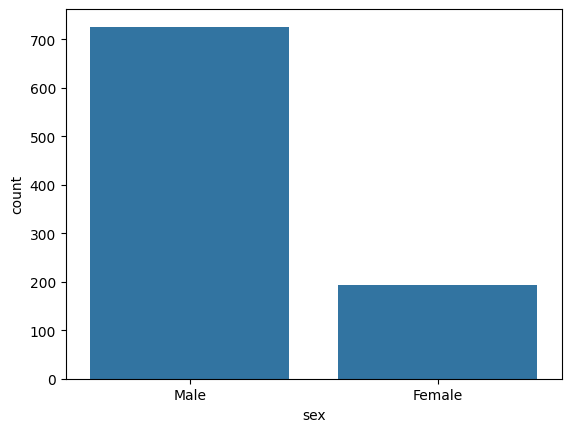

In [11]:
# Ty le nam nu
sns.barplot(data=df_heart['sex'].value_counts());

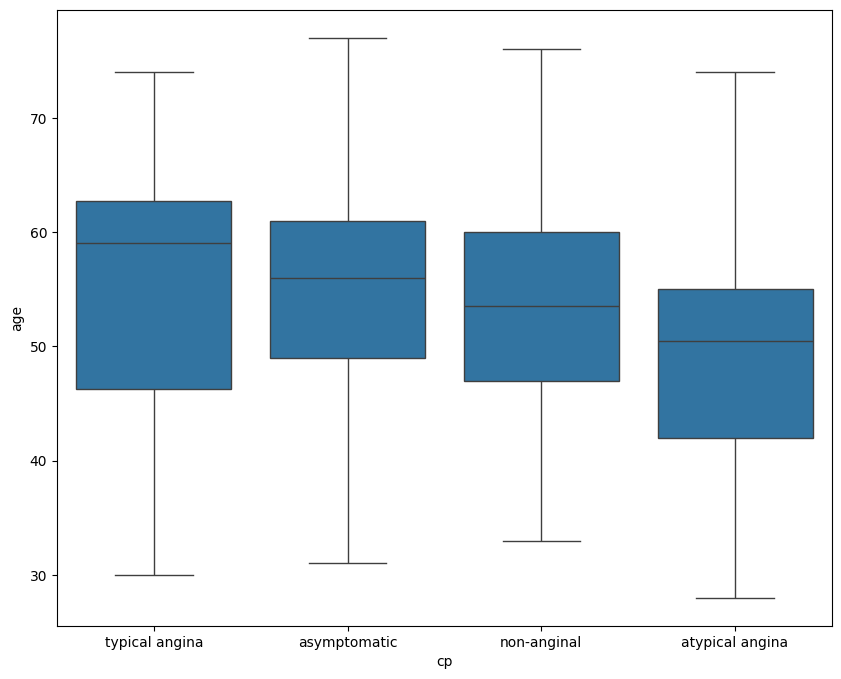

In [12]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df_heart, x='cp', y='age');

### Câu hỏi 3: Độ tuổi trung bình của bệnh nhân trong dữ liệu là bao nhiêu?
- Mục đích: Hiểu nhóm tuổi phổ biến trong tập dữ liệu.

In [13]:
print(f'Do tuoi TB cua benh nhan:', df_heart['age'].mean())

Do tuoi TB cua benh nhan: 53.51086956521739


## Mức độ trung bình (4 câu hỏi)


### Câu hỏi 4: Có sự khác biệt nào về tỷ lệ mắc bệnh tim (target) giữa nam và nữ không?
- Mục đích: Tìm hiểu sự liên quan giữa giới tính và khả năng mắc bệnh tim.

In [14]:
# Tính tỷ lệ mắc bệnh tim theo giới tính
gender_target = df_heart.groupby('sex')['target'].value_counts()
print(gender_target)

sex     target
Female  0         144
        1          50
Male    1         459
        0         267
Name: count, dtype: int64


In [15]:
male = df_heart[df_heart['sex']=='Male']
male_target = df_heart[(df_heart['sex']=='Male')&(df_heart['target']==1)]
male_percent = len(male_target)/len(male)*100
print(f'Phan tram mac benh o nam la: {male_percent:.2f}%')


female = df_heart[df_heart['sex']=='Female']
female_target = df_heart[(df_heart['sex']=='Female')&(df_heart['target']==1)]
female_percent = len(female_target)/len(female)*100
print(f'Phan tram mac benh o nam la: {female_percent:.2f}%')

Phan tram mac benh o nam la: 63.22%
Phan tram mac benh o nam la: 25.77%


### Câu hỏi 5: Nhóm đau ngực nào (cp) phổ biến nhất ở những bệnh nhân không mắc bệnh tim (target = 0)?
- Mục đích: Phân tích kiểu đau ngực ở nhóm không mắc bệnh.

In [16]:
cp_target_0=df_heart['cp'][df_heart['target']==0].value_counts()
cp_target_0

cp
atypical angina    150
non-anginal        131
asymptomatic       104
typical angina      26
Name: count, dtype: int64

In [17]:
df_cp_target_0 = cp_target_0.reset_index()
# Đổi tên các cột cho dễ hiểu
df_cp_target_0.columns = ['cp', 'values']
df_cp_target_0.head()

,cp,values
0,atypical angina,150
1,non-anginal,131
2,asymptomatic,104
3,typical angina,26


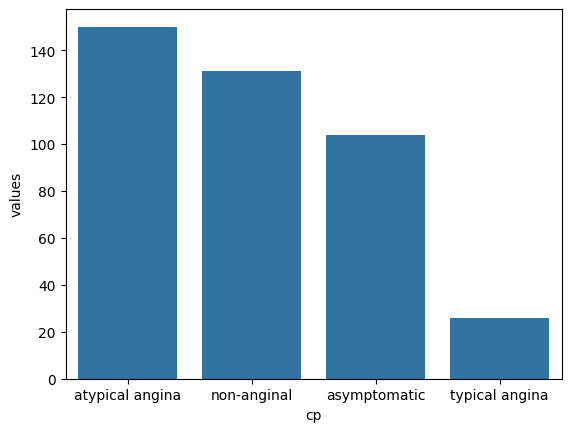

In [18]:
sns.barplot(df_cp_target_0, x='cp', y='values');

### Câu hỏi 6: Huyết áp nghỉ (trestbps) trung bình của bệnh nhân mắc bệnh tim so với bệnh nhân không mắc bệnh có khác biệt không?
- Mục đích: Xem xét mối liên hệ giữa huyết áp và bệnh tim.

In [19]:
trestbps_target_1 = df_heart[['trestbps']][df_heart['target']==1].mean()
trestbps_target_2 = df_heart[['trestbps']][df_heart['target']==0].mean()
print(f'''Huyet ap luc nghi cua nguoi mac benh {trestbps_target_1}\n
Huyet ap luc nghi cua nguoi ko mac benh {trestbps_target_2}''')

Huyet ap luc nghi cua nguoi mac benh trestbps    133.978723
dtype: float64

Huyet ap luc nghi cua nguoi ko mac benh trestbps    129.913043
dtype: float64


In [20]:
trestbps_target_1 = df_heart[['trestbps']][df_heart['target']==1].mean()
df_trestbps_target_1 = trestbps_target_1.reset_index()
df_trestbps_target_1.columns=['index', 'values']
df_trestbps_target_1

,index,values
0,trestbps,133.978723


In [21]:
trestbps_target_2 = df_heart[['trestbps']][df_heart['target']==0].mean()
df_trestbps_target_2 = trestbps_target_2.reset_index()
df_trestbps_target_2.columns=['index', 'values']
df_trestbps_target_2

,index,values
0,trestbps,129.913043


In [22]:
df_merge_trestpbs = pd.merge(df_trestbps_target_1, df_trestbps_target_2, how='inner', on=['index'])
df_merge_trestpbs

,index,values_x,values_y
0,trestbps,133.978723,129.913043


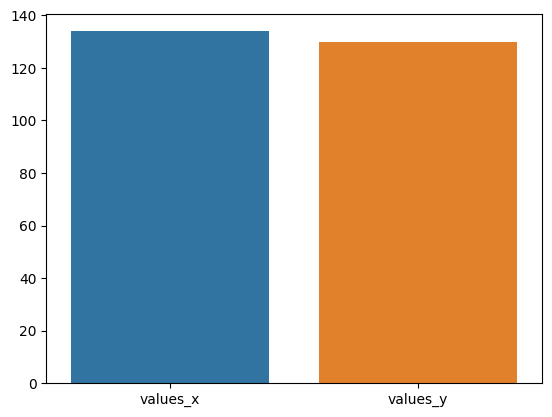

In [23]:
sns.barplot(data=df_merge_trestpbs);

### Câu hỏi 7: Nhóm bệnh nhân có giá trị cholesterol (chol) trung bình cao hơn hay thấp hơn những người không mắc bệnh tim?
- Mục đích: Đánh giá mối quan hệ giữa nồng độ cholesterol và bệnh tim.

In [24]:
chol_targer_1 = df_heart['chol'][df_heart['target']==1].mean()
chol_target_0 = df_heart['chol'][df_heart['target']==0].mean()
print(chol_target_0, chol_targer_1)

227.90561224489795 176.47991967871485


In [25]:
df_chol_target_1 = df_heart[df_heart['target']==1]
df_chol_target_1.describe(include='all')

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,target
count,509.000000,509,509,470.000000,498.000000,433,507,474.000000,474,468.000000,393,144.000000,247,509.0
unique,NaN,2,4,NaN,NaN,2,3,NaN,2,NaN,3,NaN,3,NaN
top,NaN,Male,asymptomatic,NaN,NaN,False,normal,NaN,True,NaN,flat,NaN,reversable defect,NaN
freq,NaN,459,392,NaN,NaN,339,283,NaN,282,NaN,266,NaN,154,NaN
mean,55.903733,NaN,NaN,133.978723,176.479920,NaN,NaN,128.261603,NaN,1.262607,NaN,1.131944,NaN,1.0
std,8.718959,NaN,NaN,20.552278,127.517611,NaN,NaN,24.024193,NaN,1.197424,NaN,1.012140,NaN,0.0
min,31.000000,NaN,NaN,0.000000,0.000000,NaN,NaN,60.000000,NaN,-2.600000,NaN,0.000000,NaN,1.0
25%,51.000000,NaN,NaN,120.000000,0.000000,NaN,NaN,112.000000,NaN,0.000000,NaN,0.000000,NaN,1.0
50%,57.000000,NaN,NaN,130.000000,218.000000,NaN,NaN,128.000000,NaN,1.050000,NaN,1.000000,NaN,1.0
75%,62.000000,NaN,NaN,145.000000,267.750000,NaN,NaN,145.000000,NaN,2.000000,NaN,2.000000,NaN,1.0


In [26]:
df_chol_target_0 = df_heart[df_heart['target']==0]
df_chol_target_0.describe(include='all')

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,target
count,411.000000,411,411,391.000000,392.000000,397,411,391.000000,391,390.000000,218,165.000000,187,411.0
unique,NaN,2,4,NaN,NaN,2,3,NaN,2,NaN,3,NaN,3,NaN
top,NaN,Male,atypical angina,NaN,NaN,False,normal,NaN,False,NaN,upsloping,NaN,normal,NaN
freq,NaN,267,150,NaN,NaN,353,268,NaN,336,NaN,125,NaN,138,NaN
mean,50.547445,NaN,NaN,129.913043,227.905612,NaN,NaN,148.800512,NaN,0.418205,NaN,0.278788,NaN,0.0
std,9.433700,NaN,NaN,16.869867,75.832760,NaN,NaN,23.608692,NaN,0.715636,NaN,0.640006,NaN,0.0
min,28.000000,NaN,NaN,80.000000,0.000000,NaN,NaN,69.000000,NaN,-1.100000,NaN,0.000000,NaN,0.0
25%,43.000000,NaN,NaN,120.000000,199.000000,NaN,NaN,134.500000,NaN,0.000000,NaN,0.000000,NaN,0.0
50%,51.000000,NaN,NaN,130.000000,228.000000,NaN,NaN,151.000000,NaN,0.000000,NaN,0.000000,NaN,0.0
75%,57.000000,NaN,NaN,140.000000,269.000000,NaN,NaN,167.500000,NaN,0.800000,NaN,0.000000,NaN,0.0


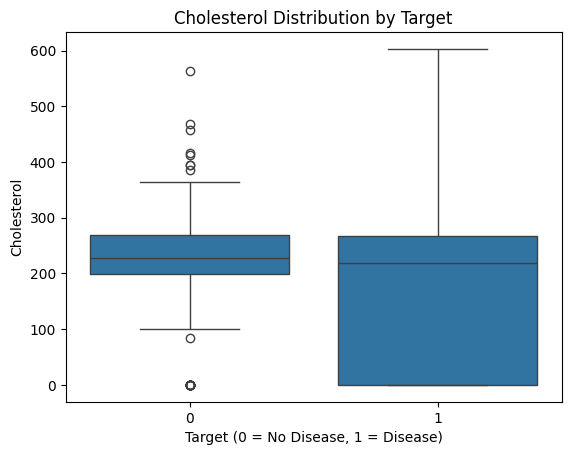

In [27]:
sns.boxplot(data=df_heart, x='target', y='chol')
plt.title('Cholesterol Distribution by Target')
plt.xlabel('Target (0 = No Disease, 1 = Disease)')
plt.ylabel('Cholesterol');

In [28]:
df_chol_target_0[df_chol_target_0[['chol']].isna().any(axis=1)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,target
305,29,Male,atypical angina,140.0,NaN,False,normal,170.0,False,0.0,NaN,NaN,NaN,0
334,39,Male,atypical angina,120.0,NaN,False,st-t abnormality,146.0,False,2.0,upsloping,NaN,NaN,0
337,39,Male,atypical angina,130.0,NaN,False,normal,120.0,False,0.0,NaN,NaN,NaN,0
347,40,Male,non-anginal,140.0,NaN,False,normal,188.0,False,0.0,NaN,NaN,NaN,0
368,43,Female,non-anginal,150.0,NaN,False,normal,175.0,False,0.0,NaN,NaN,normal,0
375,45,Female,atypical angina,180.0,NaN,False,normal,180.0,False,0.0,NaN,NaN,NaN,0
378,45,Male,non-anginal,135.0,NaN,False,normal,110.0,False,0.0,NaN,NaN,NaN,0
389,47,Female,non-anginal,130.0,NaN,False,normal,145.0,False,2.0,flat,NaN,NaN,0
394,48,Female,atypical angina,120.0,NaN,True,st-t abnormality,148.0,False,0.0,NaN,NaN,NaN,0
400,48,Male,atypical angina,100.0,NaN,False,normal,100.0,False,0.0,NaN,NaN,NaN,0


In [29]:
df_chol_target_0 = df_chol_target_0.dropna(subset='chol')
df_chol_target_0

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,target
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
5,56,Male,atypical angina,120.0,236.0,False,normal,178.0,False,0.8,upsloping,0.0,normal,0
7,57,Female,asymptomatic,120.0,354.0,False,normal,163.0,True,0.6,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
904,57,Male,asymptomatic,130.0,207.0,False,st-t abnormality,96.0,True,1.0,flat,NaN,NaN,0
909,68,Male,non-anginal,134.0,254.0,True,normal,151.0,True,0.0,NaN,NaN,normal,0
910,51,Female,asymptomatic,114.0,258.0,True,lv hypertrophy,96.0,False,1.0,upsloping,NaN,NaN,0
916,62,Male,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0


## Numeric 

#### Kiểm tra các giá trị bằng 0
- Vì 0 đối với các chỉ số trên là 0 hợp lý điều này gây nhiễu cho bộ data trên, nên cần chuyển về Nan

In [30]:
for col in df_heart[['age', 'trestbps', 'chol', 'thalch']]:
    # Đếm số lượng giá trị 0 trước khi thay thế
    zero_count = df_heart[df_heart[col] == 0].shape[0]
    
    # Thay thế giá trị 0 bằng NaN
    df_heart[col] = df_heart[col].replace(0, np.nan)
    
    # In thông tin
    print(f"Column: {col}, Dem_GT_0: {zero_count}")


Column: age, Dem_GT_0: 0
Column: trestbps, Dem_GT_0: 1
Column: chol, Dem_GT_0: 172
Column: thalch, Dem_GT_0: 0


In [31]:
df_numeric = df_heart[numeric_col]
df_numeric

,age,trestbps,chol,thalch,oldpeak,ca,target
0,63,145.0,233.0,150.0,2.3,0.0,0
1,67,160.0,286.0,108.0,1.5,3.0,1
2,67,120.0,229.0,129.0,2.6,2.0,1
3,37,130.0,250.0,187.0,3.5,0.0,0
4,41,130.0,204.0,172.0,1.4,0.0,0
...,...,...,...,...,...,...,...
915,54,127.0,333.0,154.0,0.0,NaN,1
916,62,NaN,139.0,NaN,NaN,NaN,0
917,55,122.0,223.0,100.0,0.0,NaN,1
918,58,NaN,385.0,NaN,NaN,NaN,0


#### Numeric columns

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
df_heart.isna().sum()

age           0
sex           0
cp            0
trestbps     60
chol        202
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
target        0
dtype: int64

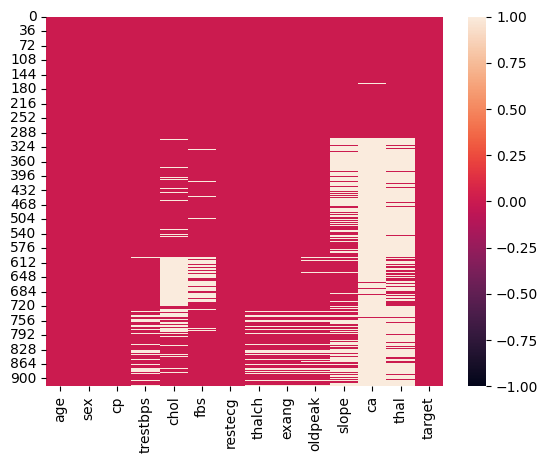

In [34]:
sns.heatmap(df_heart.isna(), vmin=-1, vmax=1);

In [35]:
from sklearn.preprocessing import OrdinalEncoder
import numpy as np

# Áp dụng OrdinalEncoder (giữ nguyên giá trị NaN)
ordinal_encoder = OrdinalEncoder()

# Chỉ encode các cột phân loại
df_heart[categories_col] = ordinal_encoder.fit_transform(df_heart[categories_col])

df_heart.isna().sum()


age           0
sex           0
cp            0
trestbps     60
chol        202
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
target        0
dtype: int64

In [36]:
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    float64
 2   cp        920 non-null    float64
 3   trestbps  860 non-null    float64
 4   chol      718 non-null    float64
 5   fbs       830 non-null    float64
 6   restecg   918 non-null    float64
 7   thalch    865 non-null    float64
 8   exang     865 non-null    float64
 9   oldpeak   858 non-null    float64
 10  slope     611 non-null    float64
 11  ca        309 non-null    float64
 12  thal      434 non-null    float64
 13  target    920 non-null    int64  
dtypes: float64(12), int64(2)
memory usage: 100.8 KB


In [37]:
corr = df_heart[['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'target']].corr()
corr

,age,trestbps,chol,thalch,oldpeak,ca,target
age,1.000000,0.253042,0.083326,-0.365778,0.258243,0.370416,0.282700
trestbps,0.253042,1.000000,0.088763,-0.102427,0.171562,0.093705,0.116959
chol,0.083326,0.088763,1.000000,-0.047186,0.046960,0.127798,0.118327
thalch,-0.365778,-0.102427,-0.047186,1.000000,-0.151174,-0.264094,-0.394503
oldpeak,0.258243,0.171562,0.046960,-0.151174,1.000000,0.281817,0.385528
ca,0.370416,0.093705,0.127798,-0.264094,0.281817,1.000000,0.455599
target,0.282700,0.116959,0.118327,-0.394503,0.385528,0.455599,1.000000


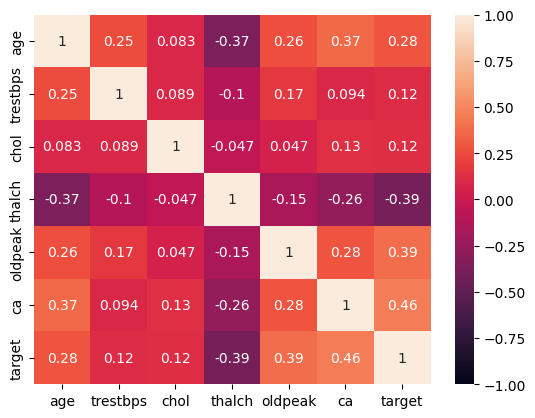

In [38]:
sns.heatmap(data=corr, annot=True,
            vmin=-1, vmax=1);

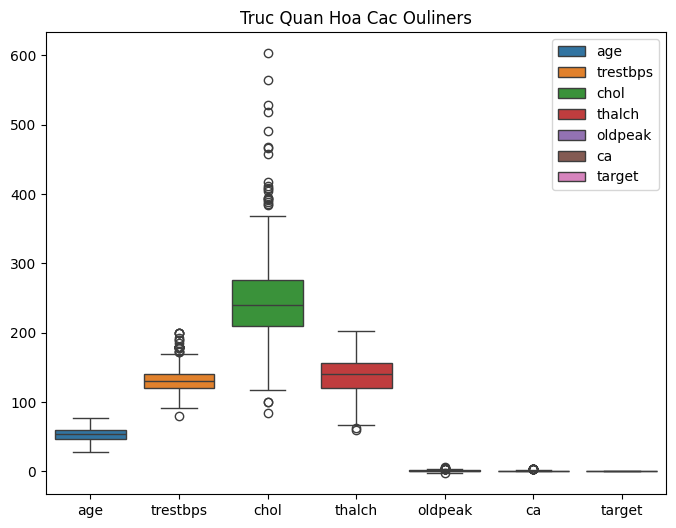

In [39]:
fig, ax = plt.subplots(figsize=(8,6))
sns.boxplot(df_heart[['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'target']], legend=True);
ax.set(title="Truc Quan Hoa Cac Ouliners");
# ax.get_xticklabels('')

In [40]:
df_heart[['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'target']].describe()

,age,trestbps,chol,thalch,oldpeak,ca,target
count,920.000000,860.000000,718.000000,865.000000,858.000000,309.000000,920.000000
mean,53.510870,132.286047,246.832869,137.545665,0.878788,0.676375,0.553261
std,9.424685,18.536175,58.527062,25.926276,1.091226,0.935653,0.497426
min,28.000000,80.000000,85.000000,60.000000,-2.600000,0.000000,0.000000
25%,47.000000,120.000000,210.000000,120.000000,0.000000,0.000000,0.000000
50%,54.000000,130.000000,239.500000,140.000000,0.500000,0.000000,1.000000
75%,60.000000,140.000000,276.750000,157.000000,1.500000,1.000000,1.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,1.000000


In [41]:
def detect_outliners_without_nan(x):
    # Bỏ qua giá trị NaN khi tính toán
    q1 = np.nanquantile(x, 0.25)
    q3 = np.nanquantile(x, 0.75)
    IQR = q3 - q1
    lower_bound = q1 - 1.5 * IQR
    upper_bound = q3 + 1.5 * IQR
    return x[(x<lower_bound)|(x>upper_bound)]
print(detect_outliners_without_nan(df_heart['chol']))
# print(detect_outliners_without_nan(df_heart['trestbps']).value_counts().sum())
# print(detect_outliners_without_nan(df_heart['thalch']).value_counts().sum())
# print(detect_outliners_without_nan(df_heart['oldpeak']).value_counts().sum())
# print(detect_outliners_without_nan(df_heart['ca']).value_counts().sum())

48     417.0
121    407.0
152    564.0
173    394.0
181    409.0
373    412.0
431    100.0
434    468.0
461    394.0
473     85.0
500    466.0
528    529.0
531    392.0
546    603.0
566    404.0
568    518.0
576    388.0
584    491.0
595    393.0
748    100.0
800    458.0
802    384.0
918    385.0
Name: chol, dtype: float64


In [42]:
outliers_dict = {}
for col in df_numeric.columns:
    outliers_dict[col] = detect_outliners_without_nan(df_heart[col]).value_counts().sum()
outliers_dict

{'age': 0,
 'trestbps': 27,
 'chol': 23,
 'thalch': 2,
 'oldpeak': 16,
 'ca': 20,
 'target': 0}

In [43]:
# # loại bỏ outliers
# for col in df_heart[['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'target']]:
#     q1 = df_heart[col].quantile(0.25)
#     q3 = df_heart[col].quantile(0.75)
#     iqr = q3 - q1
#     lower_bound = q1 - 1.5 * iqr
#     upper_bound = q3 + 1.5 * iqr

#     # Lọc dữ liệu trong khoảng hợp lý
#     # kết hợp giữ lại điều kiện nan và khoảng tứ phân vị
#     df_heart = df_heart[(df_heart[col].isna()) | (df_heart[col] >= lower_bound) & (df_heart[col] <= upper_bound)]

# df_heart

In [44]:
# loại bỏ outliers
for col in df_heart[['chol']]:
    q1 = df_heart[col].quantile(0.25)
    q3 = df_heart[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Lọc dữ liệu trong khoảng hợp lý
    # kết hợp giữ lại điều kiện nan và khoảng tứ phân vị
    df_heart = df_heart[(df_heart[col].isna()) | (df_heart[col] >= lower_bound) & (df_heart[col] <= upper_bound)]

df_heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,target
0,63,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,0.0,0
1,67,1.0,0.0,160.0,286.0,0.0,0.0,108.0,1.0,1.5,1.0,3.0,1.0,1
2,67,1.0,0.0,120.0,229.0,0.0,0.0,129.0,1.0,2.6,1.0,2.0,2.0,1
3,37,1.0,2.0,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,1.0,0
4,41,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
914,46,1.0,0.0,134.0,310.0,0.0,1.0,126.0,0.0,0.0,NaN,NaN,1.0,1
915,54,0.0,0.0,127.0,333.0,1.0,2.0,154.0,0.0,0.0,NaN,NaN,NaN,1
916,62,1.0,3.0,NaN,139.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,0
917,55,1.0,0.0,122.0,223.0,1.0,2.0,100.0,0.0,0.0,NaN,NaN,0.0,1


#### Xử lý outliners


In [45]:
# def bound(x):
#     # Bỏ qua giá trị NaN khi tính toán
#     q1 = np.nanquantile(x, 0.25)  # Tính Q1, bỏ qua NaN
#     q3 = np.nanquantile(x, 0.75)  # Tính Q3, bỏ qua NaN
#     IQR = q3 - q1
#     lower_bound = q1 - 1.5 * IQR
#     upper_bound = q3 + 1.5 * IQR
#     return [lower_bound, upper_bound]



In [46]:
df_heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,target
count,897.000000,897.000000,897.000000,838.000000,695.000000,809.000000,895.000000,843.000000,843.000000,836.000000,597.000000,303.000000,425.000000,897.000000
mean,53.499443,0.793757,0.791527,132.140811,241.820144,0.164400,0.995531,137.600237,0.389087,0.876794,1.234506,0.669967,1.336471,0.552954
std,9.441446,0.404833,0.960152,18.548570,46.661058,0.370868,0.632793,26.040127,0.487832,1.093207,0.622790,0.929638,0.656759,0.497465
min,28.000000,0.000000,0.000000,80.000000,117.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,1.000000,0.000000,120.000000,209.000000,0.000000,1.000000,120.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,0.000000,130.000000,237.000000,0.000000,1.000000,140.000000,0.000000,0.500000,1.000000,0.000000,1.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,274.000000,0.000000,1.000000,158.000000,1.000000,1.500000,2.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,369.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


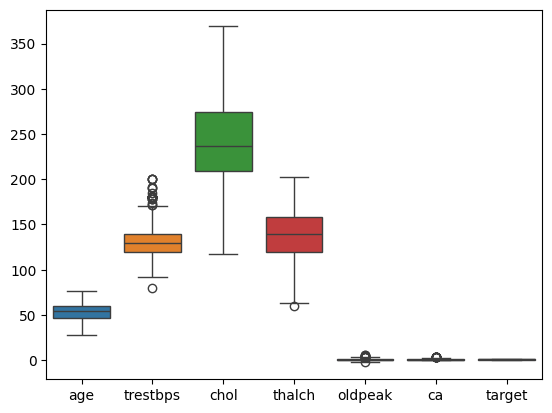

In [47]:
sns.boxplot(data=df_heart[['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'target']]);

In [48]:
# Dung MICE dien Missing Data
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
# Khởi tạo MICE imputer
imputer = IterativeImputer(max_iter=20, random_state=0)
df_heart = imputer.fit_transform(df_heart)
df_heart = pd.DataFrame(df_heart, columns=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                                            'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'])
df_heart.head(50)

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,0.0,0.0
1,67.0,1.0,0.0,160.0,286.0,0.0,0.0,108.0,1.0,1.5,1.0,3.0,1.0,1.0
2,67.0,1.0,0.0,120.0,229.0,0.0,0.0,129.0,1.0,2.6,1.0,2.0,2.0,1.0
3,37.0,1.0,2.0,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,1.0,0.0
4,41.0,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,1.0,0.0
5,56.0,1.0,1.0,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,1.0,0.0
6,62.0,0.0,0.0,140.0,268.0,0.0,0.0,160.0,0.0,3.6,0.0,2.0,1.0,1.0
7,57.0,0.0,0.0,120.0,354.0,0.0,1.0,163.0,1.0,0.6,2.0,0.0,1.0,0.0
8,63.0,1.0,0.0,130.0,254.0,0.0,0.0,147.0,0.0,1.4,1.0,1.0,2.0,1.0
9,53.0,1.0,0.0,140.0,203.0,1.0,0.0,155.0,1.0,3.1,0.0,0.0,2.0,1.0


In [49]:
df_heart = df_heart.round()
df_heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.0,0.0,0.0,0.0,0.0
1,67.0,1.0,0.0,160.0,286.0,0.0,0.0,108.0,1.0,2.0,1.0,3.0,1.0,1.0
2,67.0,1.0,0.0,120.0,229.0,0.0,0.0,129.0,1.0,3.0,1.0,2.0,2.0,1.0
3,37.0,1.0,2.0,130.0,250.0,0.0,1.0,187.0,0.0,4.0,0.0,0.0,1.0,0.0
4,41.0,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.0,2.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
892,46.0,1.0,0.0,134.0,310.0,0.0,1.0,126.0,0.0,0.0,1.0,1.0,1.0,1.0
893,54.0,0.0,0.0,127.0,333.0,1.0,2.0,154.0,0.0,0.0,2.0,1.0,1.0,1.0
894,62.0,1.0,3.0,134.0,139.0,0.0,2.0,137.0,-0.0,1.0,1.0,0.0,1.0,0.0
895,55.0,1.0,0.0,122.0,223.0,1.0,2.0,100.0,0.0,0.0,1.0,1.0,0.0,1.0


In [50]:
df_heart['ca'] = df_heart['ca'].replace({-0: 0, -1: 0})
df_heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.0,0.0,0.0,0.0,0.0
1,67.0,1.0,0.0,160.0,286.0,0.0,0.0,108.0,1.0,2.0,1.0,3.0,1.0,1.0
2,67.0,1.0,0.0,120.0,229.0,0.0,0.0,129.0,1.0,3.0,1.0,2.0,2.0,1.0
3,37.0,1.0,2.0,130.0,250.0,0.0,1.0,187.0,0.0,4.0,0.0,0.0,1.0,0.0
4,41.0,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.0,2.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
892,46.0,1.0,0.0,134.0,310.0,0.0,1.0,126.0,0.0,0.0,1.0,1.0,1.0,1.0
893,54.0,0.0,0.0,127.0,333.0,1.0,2.0,154.0,0.0,0.0,2.0,1.0,1.0,1.0
894,62.0,1.0,3.0,134.0,139.0,0.0,2.0,137.0,-0.0,1.0,1.0,0.0,1.0,0.0
895,55.0,1.0,0.0,122.0,223.0,1.0,2.0,100.0,0.0,0.0,1.0,1.0,0.0,1.0


In [51]:
df_heart.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

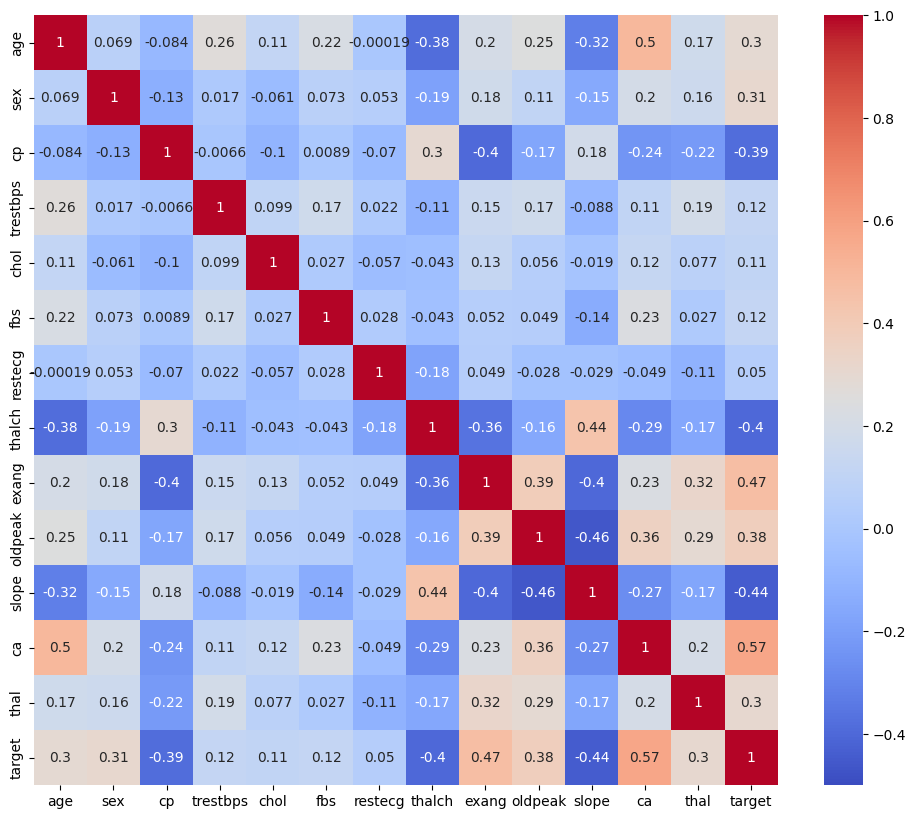

In [52]:
plt.figure(figsize=(12,10))
sns.heatmap(df_heart.corr(), annot=True, 
            vmin=-0.5, vmax=1, cmap='coolwarm');

In [53]:
df_heart[numeric_col].columns

Index(['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'target'], dtype='object')

## Xem Distribution của các đặc trưng

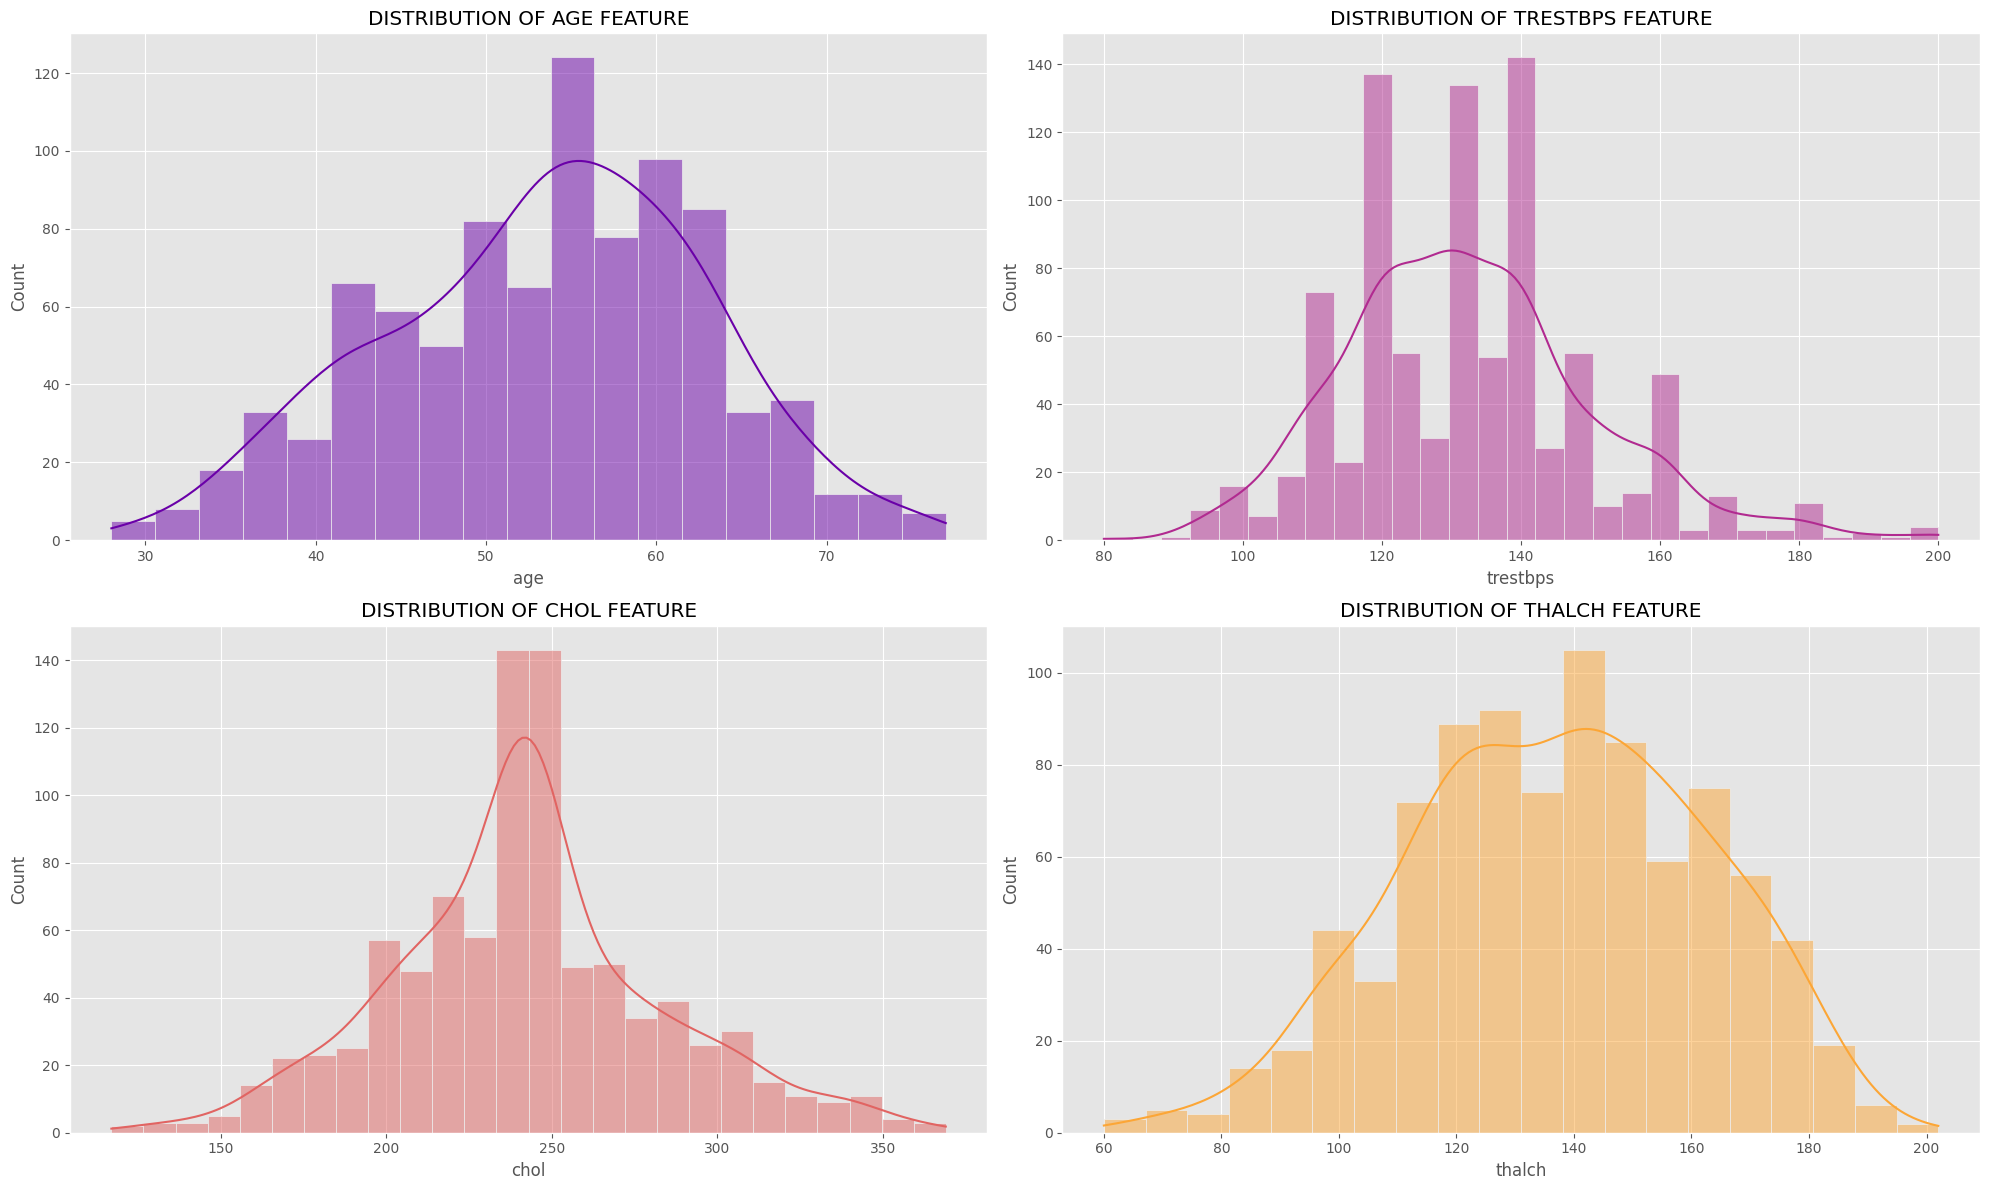

In [54]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(20,12), nrows=2, ncols=2)
ax = ax.flatten()

colors = sns.color_palette("plasma", len(df_heart[['age', 'trestbps', 'chol', 'thalch']].columns))
# colors = ['#FF5733', '#33FF57', '#3357FF', '#FF33A6', '#FFD133', '#A633FF']



for i,col in enumerate(df_heart[['age', 'trestbps', 'chol', 'thalch']].columns):
    sns.histplot(df_heart[col], kde=True, ax=ax[i],
                 color=colors[i]);
    ax[i].set(title=f'DISTRIBUTION OF {col.upper()} FEATURE')
plt.tight_layout()

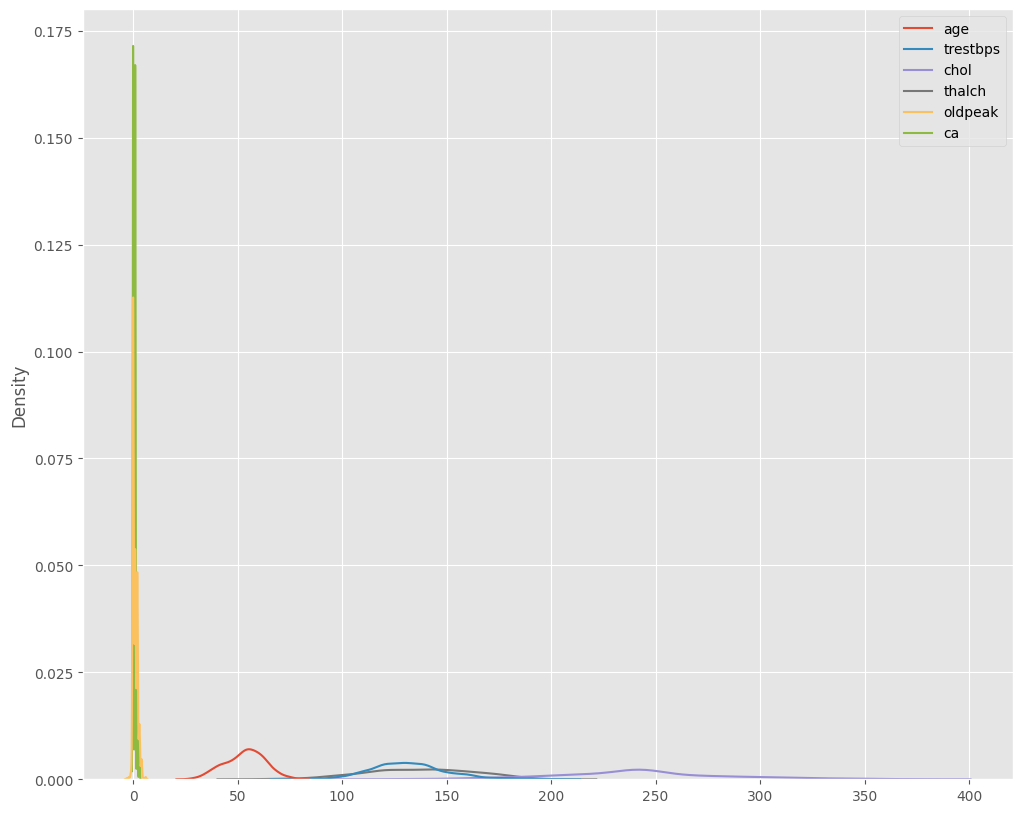

In [55]:
fig, ax = plt.subplots(figsize=(12,10))
sns.kdeplot(df_heart[numeric_col].iloc[:, :-1]);


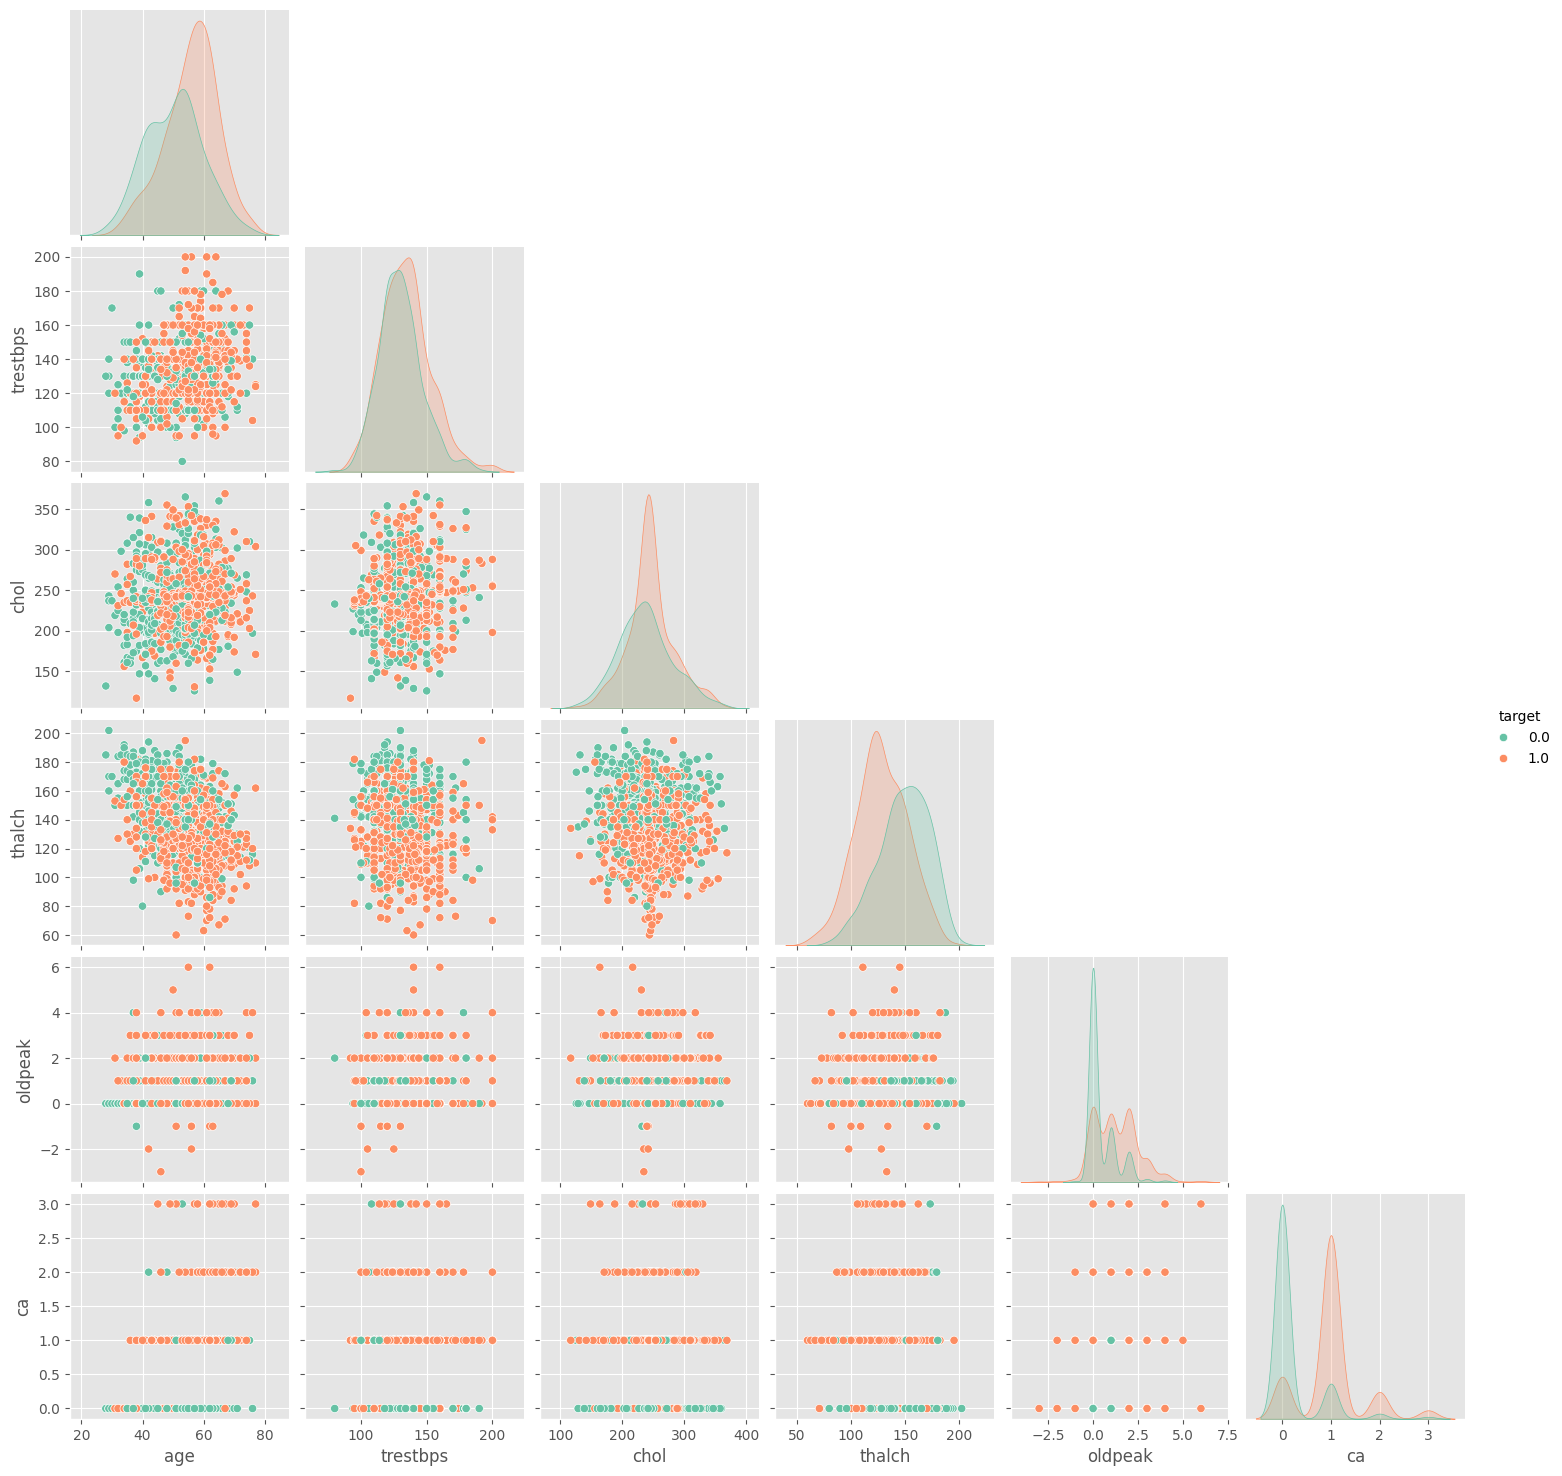

In [56]:
sns.pairplot(df_heart[numeric_col], hue='target', palette='Set2', diag_kind='kde', corner=True);


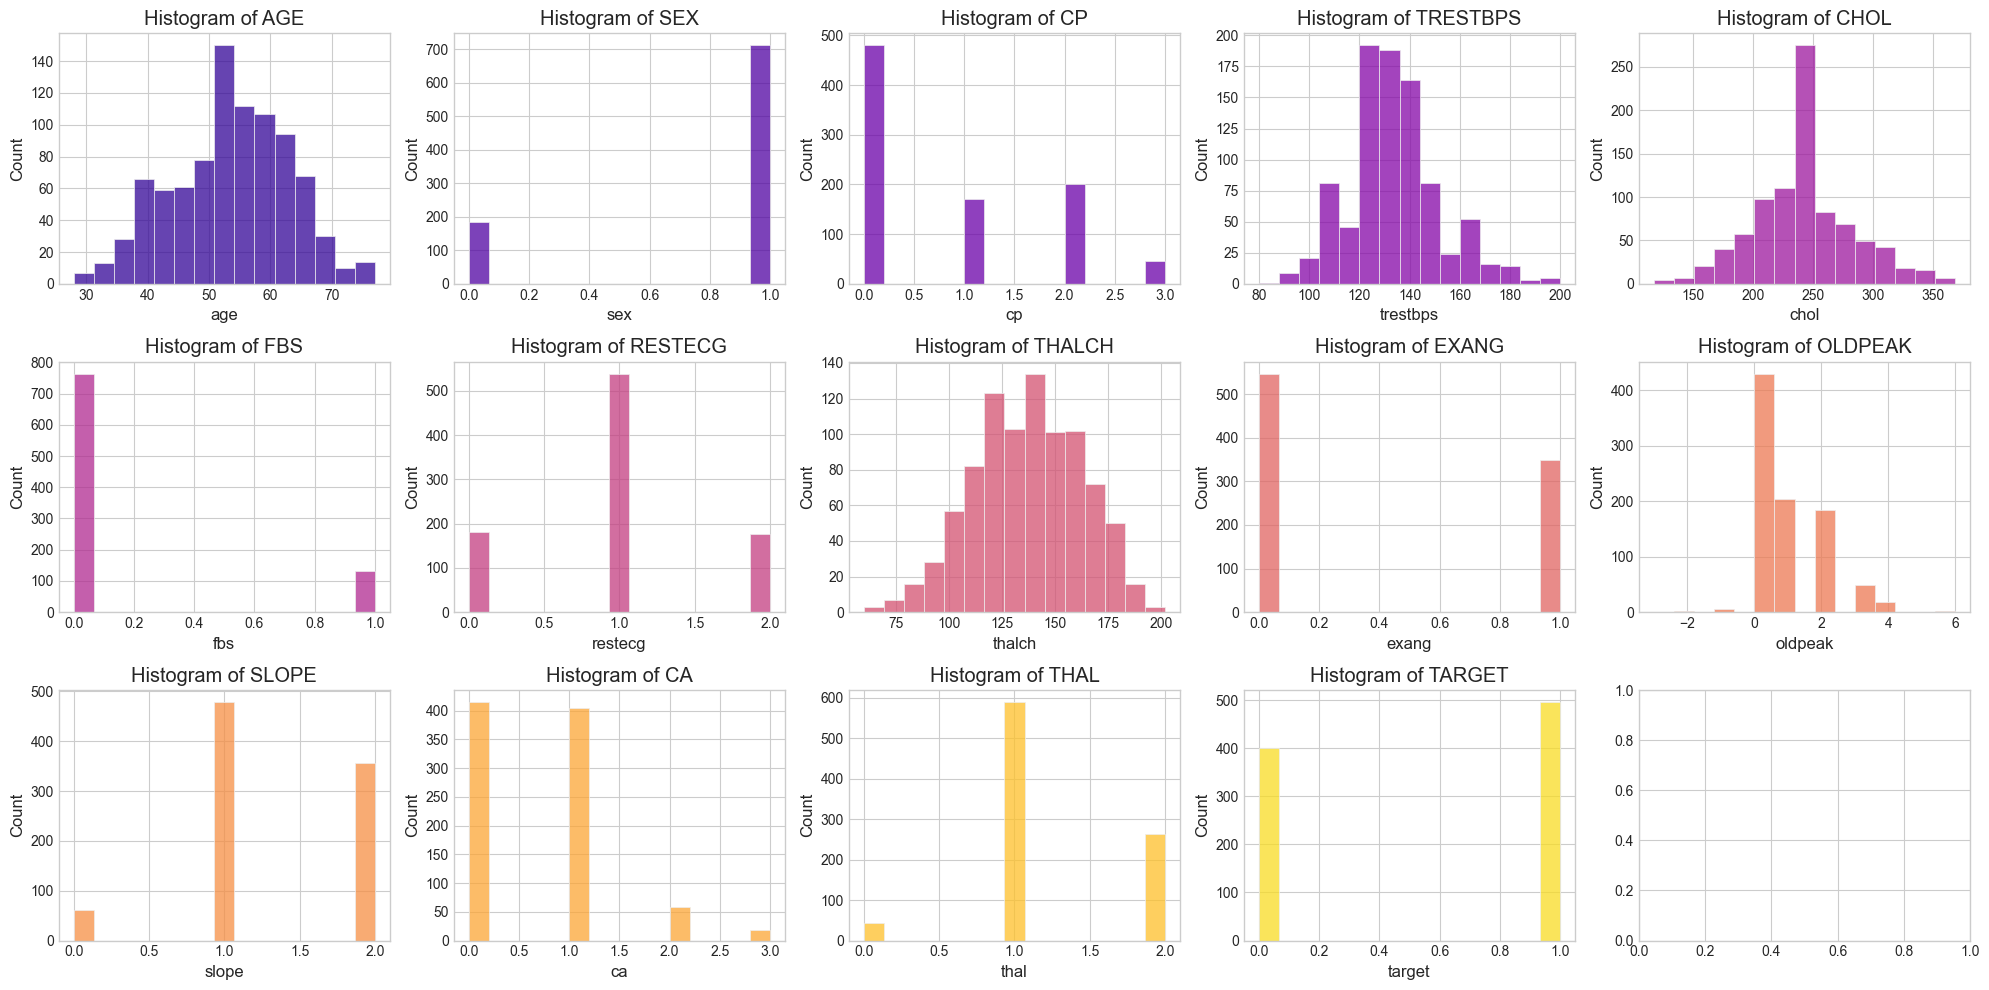

In [57]:
plt.style.use('seaborn-v0_8-whitegrid')
vibrant_palette = sns.color_palette("plasma", len(df_heart.columns))

fig, axes = plt.subplots(3, 5, figsize=(20, 10))
axes = axes.flatten()

for i, col in enumerate(df_heart.columns):
    sns.histplot(data=df_heart[col], ax=axes[i], bins=15,  color=vibrant_palette[i % len(vibrant_palette)])
    axes[i].set_title(f"Histogram of {col.upper()}")

plt.tight_layout()

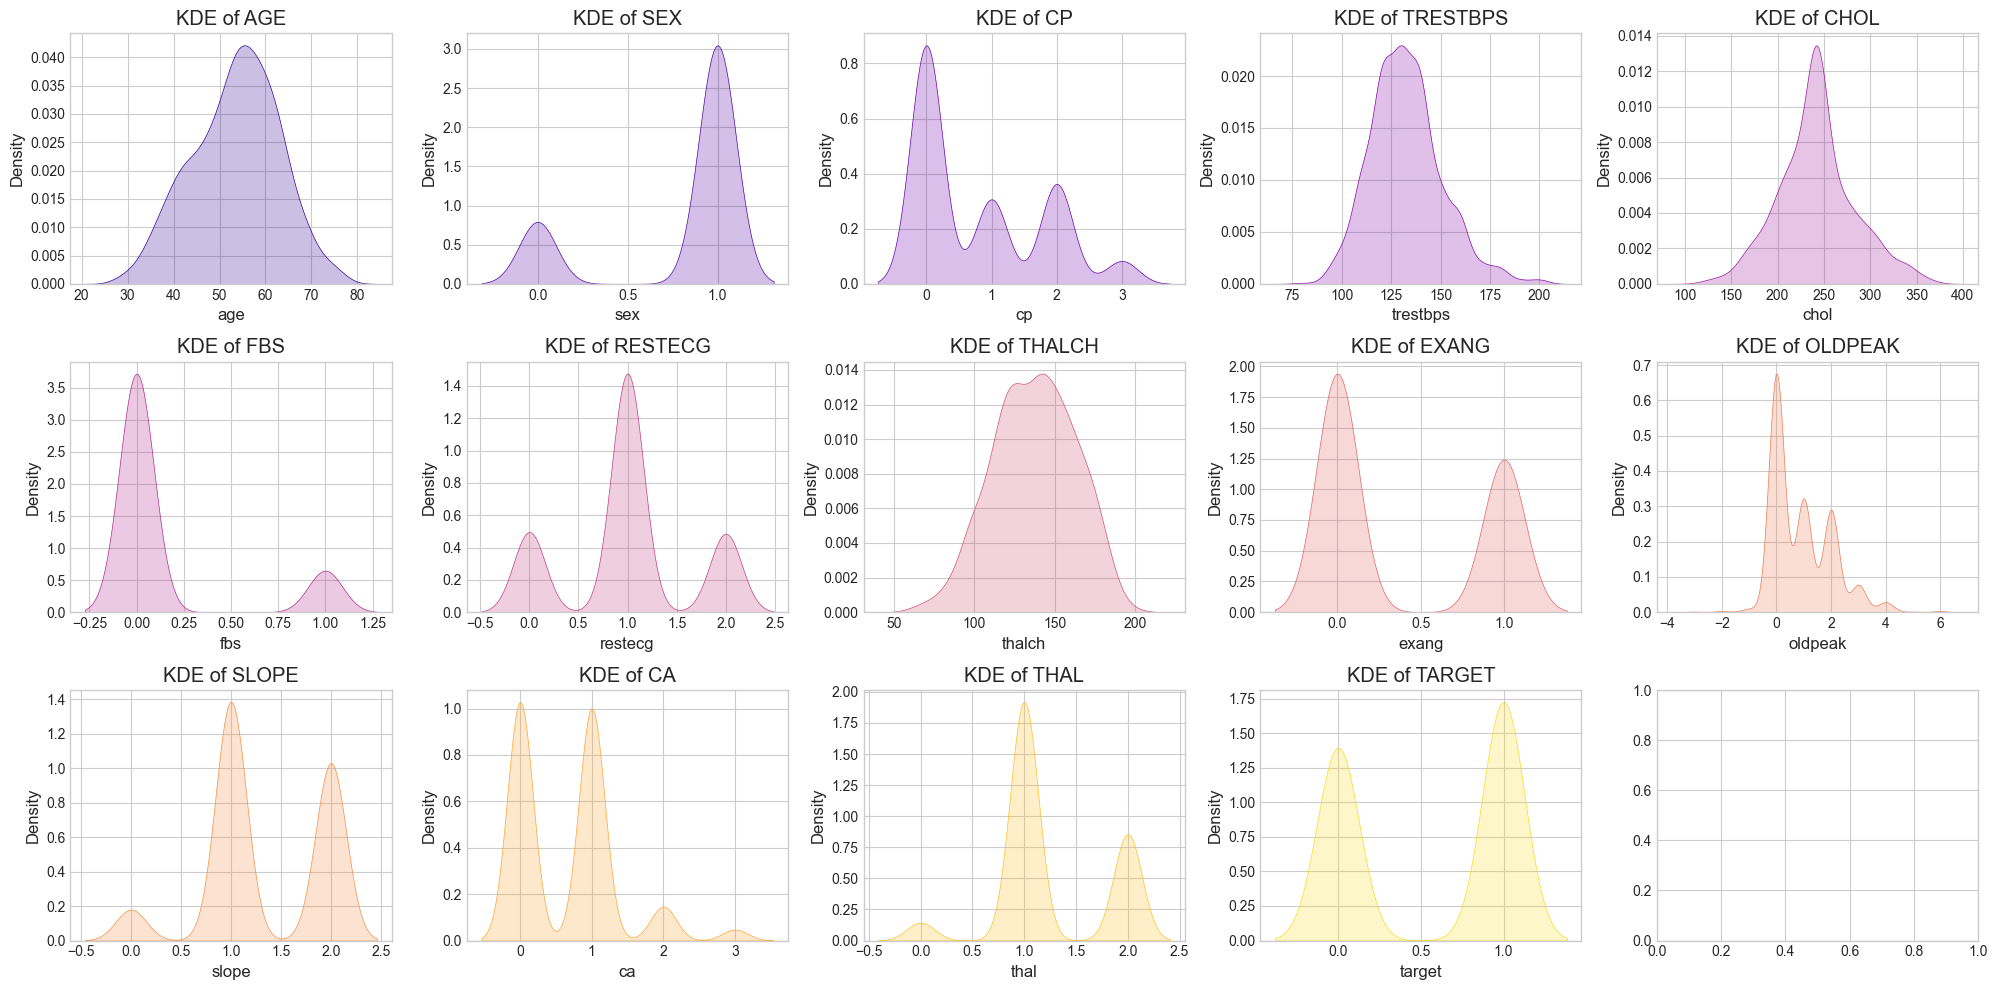

In [58]:
vibrant_palette = sns.color_palette("plasma", len(df_heart.columns))

fig, axes = plt.subplots(3, 5, figsize=(20, 10))
axes = axes.flatten()

for i, col in enumerate(df_heart.columns):
    sns.kdeplot(data=df_heart[col], ax=axes[i], color=vibrant_palette[i % len(vibrant_palette)], fill=True)
    axes[i].set_title(f"KDE of {col.upper()}")
plt.tight_layout()

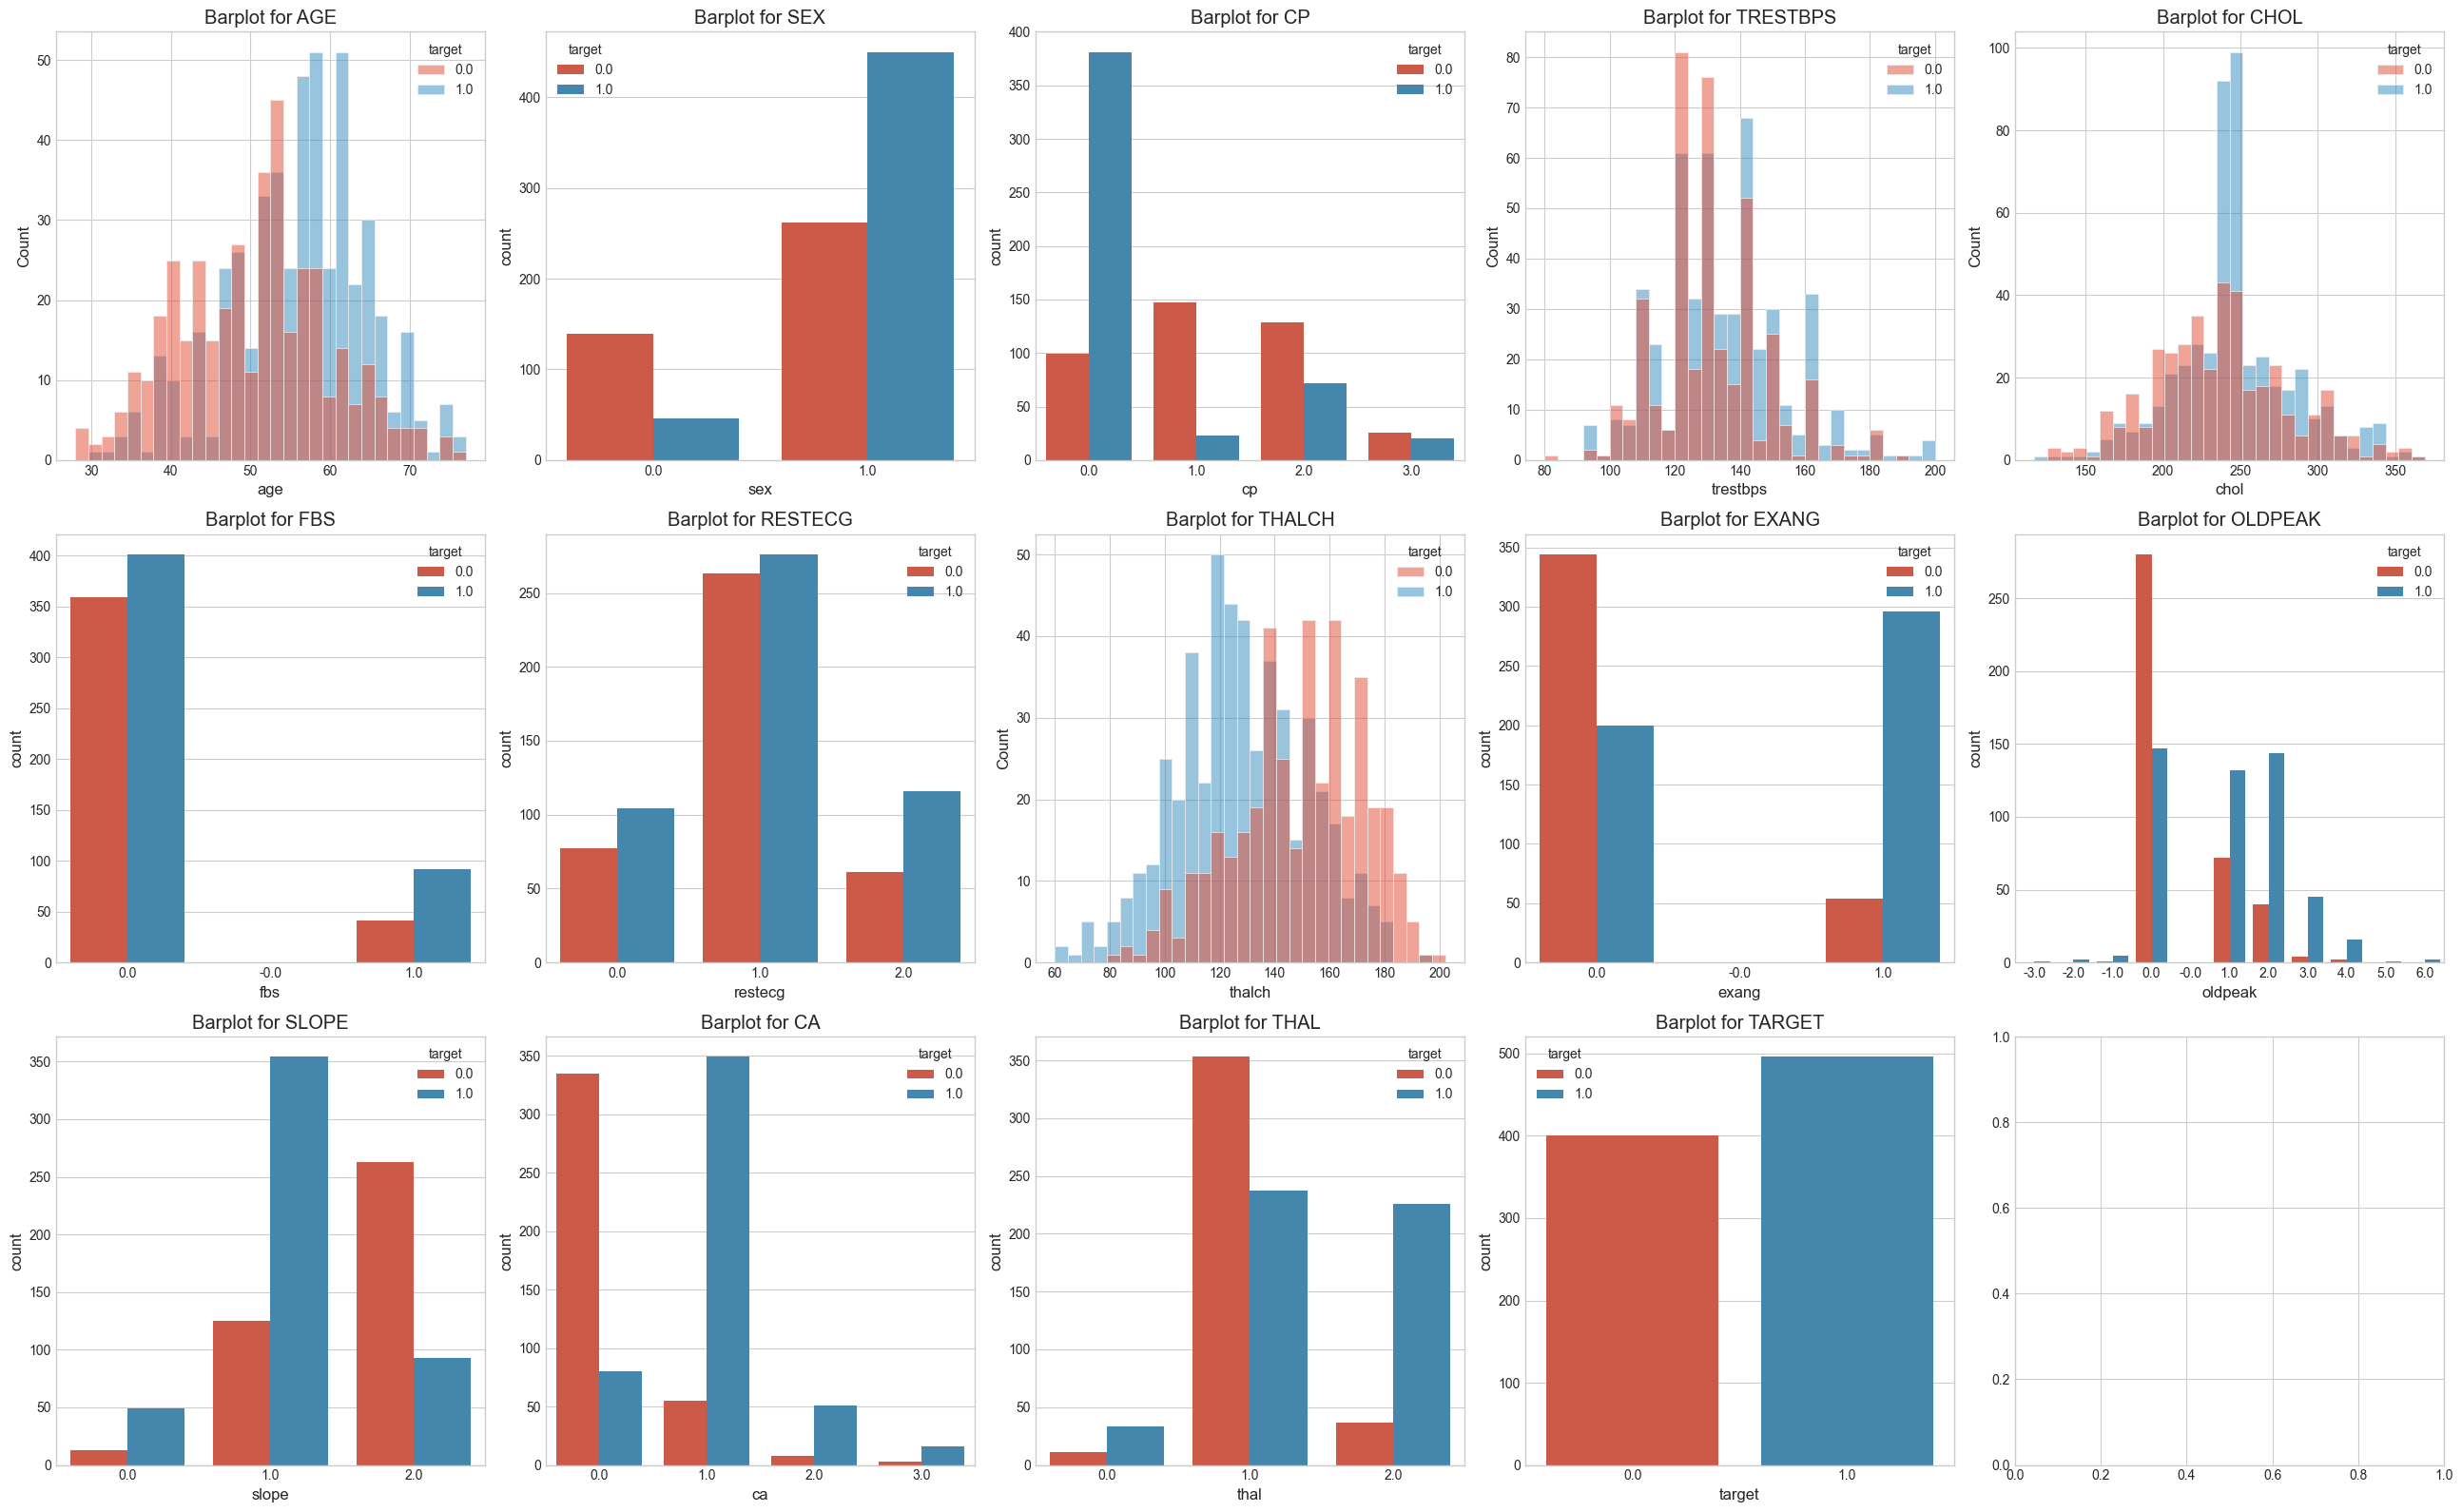

In [59]:
fig, axes = plt.subplots(figsize=(26, 16), nrows=3, ncols=5)
axes = axes.flatten()

# Tạo biểu đồ barplot cho từng cột
for i, col in enumerate(df_heart.columns):
    ax = axes[i]
    if col in df_heart[['age',	'trestbps',	'chol',	'thalch']]:
        # Với các cột phân loại, đếm số lượng từng giá trị
        sns.histplot(data=df_heart, x=col, hue='target', ax=ax, bins=30)
    else:
        # Với các cột số, vẽ biểu đồ phân bố trung bình theo trạng thái satisfaction
        sns.countplot(data=df_heart, x=col, hue='target', ax=ax)
    ax.set_title(f'Barplot for {col.upper()}')

plt.tight_layout()
plt.show();

In [60]:
# Kiem tra do lech va nhon 
for col in df_heart[numeric_col].columns[:-1]:
    skew = df_heart[col].skew()
    kurt = df_heart[col].kurt()
    print(f'Do lech va nhon cua {col.upper()} la luot la: {skew}, {kurt}')


Do lech va nhon cua AGE la luot la: -0.18518320281861034, -0.3912092018870008
Do lech va nhon cua TRESTBPS la luot la: 0.6077845768484645, 0.8140950596881016
Do lech va nhon cua CHOL la luot la: 0.2258313110584273, 0.40817134483822315
Do lech va nhon cua THALCH la luot la: -0.15639007231214477, -0.4528692393685745
Do lech va nhon cua OLDPEAK la luot la: 0.9671802277878943, 1.067195927904958
Do lech va nhon cua CA la luot la: 0.9876389201115056, 1.0516455283379313


## Logictis Regression

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, classification_report
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.decomposition import PCA
# from statsmodels.formula.api import ols
# from scipy.stats import shapiro, bartlett
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# from sklearn.feature_selection import f_regression


In [62]:
# Chia dữ liệu thành Train và Test
X = df_heart.drop(columns=['target'])
y = df_heart['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Chuẩn hóa dữ liệu chỉ trên tập Train
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # Áp dụng các tham số chuẩn hóa từ X_train lên X_test

# PCA trên tập Train
pca = PCA()
pca.fit(X_train_scaled)
# pca.fit(X_test_scaled)

explained_var = pca.explained_variance_ratio_
print(f'Ty le phuong sai giai thich', explained_var)

# chon tren phuong sai tich luy
cumsum_explained_var = np.cumsum(pca.explained_variance_ratio_)
print(f'Phuong sai tich luy', cumsum_explained_var)

# lua chon thanh phan chinh
n_components = np.argmax(cumsum_explained_var >= 0.9)+1
print(f'So luong thanh phan chinh duoc chon la: {n_components}')

pca= PCA(n_components=n_components)
X_pca_train_reduced = pca.fit_transform(X_train_scaled)

X_pca_test_reduced = pca.transform(X_test_scaled)



Ty le phuong sai giai thich [0.25775296 0.14839085 0.13440242 0.08955944 0.08050537 0.06077262
 0.05516818 0.04151785 0.03448634 0.02841932 0.02640867 0.02319625
 0.01941973]
Phuong sai tich luy [0.25775296 0.40614382 0.54054624 0.63010568 0.71061104 0.77138366
 0.82655184 0.86806969 0.90255603 0.93097535 0.95738402 0.98058027
 1.        ]
So luong thanh phan chinh duoc chon la: 9


In [63]:
# # Huấn luyện Logistic Regression
# model = LogisticRegression()
# model.fit(X_pca_train_reduced, y_train)

# # Intercept và Coefficients
# intercept = model.intercept_
# coefficients = model.coef_
# print(f'He so chan Intercept: {intercept}')
# print(f'He So Hoi Quy Ung Voi Tung Dac Trung Coefficients: {coefficients}')
# print('--================================--')

# # Dự đoán trên tập Test
# y_pred = model.predict(X_pca_test_reduced)

# # Đánh giá mô hình
# print("Accuracy:", accuracy_score(y_test, y_pred))
# print('--================================--')
# print("Classification Report:\n", classification_report(y_test, y_pred))

### Đánh giá mô hình


In [64]:
from statsmodels.api import Logit
import statsmodels.api as sm

In [65]:
X = X_pca_train_reduced
X = sm.add_constant(X_pca_train_reduced)
model = Logit(y_train, X).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.328314
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  717
Model:                          Logit   Df Residuals:                      707
Method:                           MLE   Df Model:                            9
Date:                Sun, 05 Jan 2025   Pseudo R-squ.:                  0.5215
Time:                        23:24:05   Log-Likelihood:                -235.40
converged:                       True   LL-Null:                       -491.94
Covariance Type:            nonrobust   LLR p-value:                9.134e-105
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6752      0.130      5.212      0.000       0.421       0.929
x1             2.0563      0.

In [66]:
X_pca_train_reduced =np.delete(X_pca_train_reduced, 3,axis=1)

# Thêm hằng số cho mô hình
X_1 = sm.add_constant(X_pca_train_reduced)

# Xây dựng lại mô hình Logistic Regression
model = Logit(y_train, X_1).fit()

# Hiển thị tóm tắt kết quả
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.328666
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  717
Model:                          Logit   Df Residuals:                      708
Method:                           MLE   Df Model:                            8
Date:                Sun, 05 Jan 2025   Pseudo R-squ.:                  0.5210
Time:                        23:24:05   Log-Likelihood:                -235.65
converged:                       True   LL-Null:                       -491.94
Covariance Type:            nonrobust   LLR p-value:                1.416e-105
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6658      0.129      5.176      0.000       0.414       0.918
x1             2.0486      0.

In [ ]:
# X_pca_train_reduced =np.delete(X_pca_train_reduced, 8,axis=1)

# # Thêm hằng số cho mô hình
# X_2 = sm.add_constant(X_pca_train_reduced)

# # Xây dựng lại mô hình Logistic Regression
# model = Logit(y_train, X_2).fit()

# # Hiển thị tóm tắt kết quả
# print(model.summary())

In [ ]:
# X_pca_train_reduced =np.delete(X_pca_train_reduced, 5,axis=1)

# # Thêm hằng số cho mô hình
# X_3 = sm.add_constant(X_pca_train_reduced)

# # Xây dựng lại mô hình Logistic Regression
# model = Logit(y_train, X_3).fit()

# # Hiển thị tóm tắt kết quả
# print(model.summary())

In [ ]:
# X_pca_train_reduced =np.delete(X_pca_train_reduced, 4,axis=1)

# # Thêm hằng số cho mô hình
# X_4 = sm.add_constant(X_pca_train_reduced)

# # Xây dựng lại mô hình Logistic Regression
# model = Logit(y_train, X_4).fit()

# # Hiển thị tóm tắt kết quả
# print(model.summary())

In [ ]:
# X_pca_train_reduced =np.delete(X_pca_train_reduced, 2,axis=1)

# # Thêm hằng số cho mô hình
# X_5 = sm.add_constant(X_pca_train_reduced)

# # Xây dựng lại mô hình Logistic Regression
# model = Logit(y_train, X_5).fit()

# # Hiển thị tóm tắt kết quả
# print(model.summary())

In [ ]:
# X_pca_train_reduced =np.delete(X_pca_train_reduced, 3,axis=1)

# # Thêm hằng số cho mô hình
# X_6 = sm.add_constant(X_pca_train_reduced)

# # Xây dựng lại mô hình Logistic Regression
# model = Logit(y_train, X_6).fit()

# # Hiển thị tóm tắt kết quả
# print(model.summary())

In [552]:
# X_pca_test_reduced = np.delete(X_pca_test_reduced, [2, 3, 4, 5, 8, 9], axis=1)


In [68]:
X_pca_test_reduced = np.delete(X_pca_test_reduced, [3], axis=1)


In [69]:
# Huấn luyện Logistic Regression
model = LogisticRegression()
model.fit(X_pca_train_reduced, y_train)

# Intercept và Coefficients
intercept = model.intercept_
coefficients = model.coef_
print(f'He so chan Intercept: {intercept}')
print(f'He So Hoi Quy Ung Voi Tung Dac Trung Coefficients: {coefficients}')
print('--================================--')

# Dự đoán trên tập Test
y_pred = model.predict(X_pca_test_reduced)

# Đánh giá mô hình
print("Accuracy:", accuracy_score(y_test, y_pred))
print('--================================--')
print("Classification Report:\n", classification_report(y_test, y_pred))

He so chan Intercept: [0.63324623]
He So Hoi Quy Ung Voi Tung Dac Trung Coefficients: [[ 1.95775961 -0.68703695 -0.65640338 -1.16877642  1.44326084  0.82079419
  -1.03617265  0.59308204]]
--================================--
Accuracy: 0.8333333333333334
--================================--
Classification Report:
               precision    recall  f1-score   support

         0.0       0.83      0.81      0.82        85
         1.0       0.84      0.85      0.84        95

    accuracy                           0.83       180
   macro avg       0.83      0.83      0.83       180
weighted avg       0.83      0.83      0.83       180



In [ ]:
save model 

In [70]:
for x in range(len(y_pred)):
    print(f'Du doan {y_pred[x]}, Dau ra {y_test.iloc[x]}')

Du doan 0.0, Dau ra 0.0
Du doan 1.0, Dau ra 1.0
Du doan 0.0, Dau ra 0.0
Du doan 1.0, Dau ra 1.0
Du doan 0.0, Dau ra 0.0
Du doan 0.0, Dau ra 0.0
Du doan 0.0, Dau ra 0.0
Du doan 0.0, Dau ra 0.0
Du doan 1.0, Dau ra 1.0
Du doan 1.0, Dau ra 1.0
Du doan 0.0, Dau ra 0.0
Du doan 1.0, Dau ra 1.0
Du doan 0.0, Dau ra 0.0
Du doan 1.0, Dau ra 1.0
Du doan 0.0, Dau ra 0.0
Du doan 1.0, Dau ra 1.0
Du doan 0.0, Dau ra 0.0
Du doan 1.0, Dau ra 1.0
Du doan 1.0, Dau ra 1.0
Du doan 1.0, Dau ra 1.0
Du doan 0.0, Dau ra 1.0
Du doan 0.0, Dau ra 0.0
Du doan 0.0, Dau ra 0.0
Du doan 0.0, Dau ra 0.0
Du doan 1.0, Dau ra 1.0
Du doan 0.0, Dau ra 0.0
Du doan 1.0, Dau ra 0.0
Du doan 0.0, Dau ra 0.0
Du doan 1.0, Dau ra 1.0
Du doan 0.0, Dau ra 0.0
Du doan 1.0, Dau ra 1.0
Du doan 1.0, Dau ra 1.0
Du doan 0.0, Dau ra 1.0
Du doan 0.0, Dau ra 0.0
Du doan 0.0, Dau ra 1.0
Du doan 1.0, Dau ra 1.0
Du doan 1.0, Dau ra 1.0
Du doan 0.0, Dau ra 0.0
Du doan 0.0, Dau ra 0.0
Du doan 1.0, Dau ra 0.0
Du doan 0.0, Dau ra 0.0
Du doan 0.0, Dau

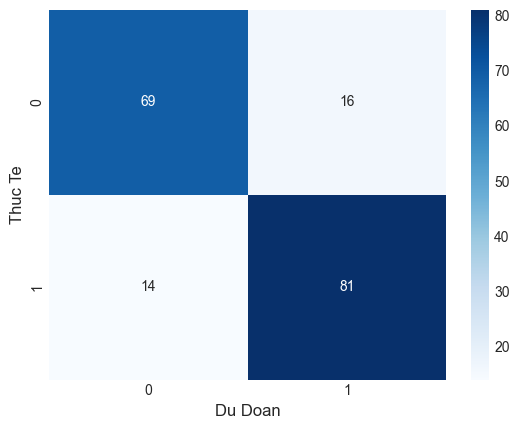

In [71]:
sns.heatmap(confusion_matrix(y_test, y_pred), cmap='Blues', annot=True);
plt.xlabel('Du Doan')
plt.ylabel("Thuc Te");

In [556]:
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score, classification_report
# import numpy as np

# # Chia dữ liệu thành Train và Test
# X = df_heart.drop(columns=['target'])
# y = df_heart['target']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Chuẩn hóa dữ liệu chỉ trên tập Train
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)  # Áp dụng các tham số chuẩn hóa từ X_train lên X_test

# # PCA trên tập Train
# pca = PCA()
# pca.fit(X_train_scaled)

# # Giải thích tỷ lệ phương sai
# explained_var = pca.explained_variance_ratio_
# print(f'Ty le phuong sai giai thich: {explained_var}')

# # Phương sai tích lũy
# cumsum_explained_var = np.cumsum(explained_var)
# print(f'Phuong sai tich luy: {cumsum_explained_var}')

# # Lựa chọn số lượng thành phần chính dựa trên phương sai tích lũy
# n_components = np.argmax(cumsum_explained_var >= 0.8) + 1
# print(f'So luong thanh phan chinh duoc chon la: {n_components}')

# # PCA với số thành phần đã chọn
# pca = PCA(n_components=n_components)
# X_pca_train_reduced = pca.fit_transform(X_train_scaled)

# # Áp dụng PCA đã học từ tập train lên tập test
# X_pca_test_reduced = pca.transform(X_test_scaled)

# # Huấn luyện Logistic Regression
# model = LogisticRegression()
# model.fit(X_pca_train_reduced, y_train)

# # Intercept và Coefficients
# intercept = model.intercept_
# coefficients = model.coef_
# print(f'He so chan Intercept: {intercept}')
# print(f'He So Hoi Quy Ung Voi Tung Dac Trung Coefficients: {coefficients}')
# print('--================================--')

# # Dự đoán trên tập Test
# y_pred = model.predict(X_pca_test_reduced)

# # Đánh giá mô hình
# print("Accuracy:", accuracy_score(y_test, y_pred))
# print('--================================--')
# print("Classification Report:\n", classification_report(y_test, y_pred))


### Test

In [557]:
for
model_pca = ols('y~X_pca_reduced', data=df_heart).fit()
print(model_pca.summary())

SyntaxError: invalid syntax (2670291744.py, line 1)

In [ ]:
X_pca_reduced = np.delete(X_pca_reduced, 5, axis=1)
X_pca_reduced.shape

In [ ]:
model_pca = ols('y~X_pca_reduced', data=df_heart).fit()
print(model_pca.summary())

In [ ]:
X_pca_reduced = np.delete(X_pca_reduced, 7, axis=1)
X_pca_reduced.shape

In [ ]:
model_pca = ols('y~X_pca_reduced', data=df_heart).fit()
print(model_pca.summary())

In [ ]:
X_pca_reduced = np.delete(X_pca_reduced, 4, axis=1)
X_pca_reduced.shape

In [ ]:
model_pca = ols('y~X_pca_reduced', data=df_heart).fit()
print(model_pca.summary())

### Categories 

In [ ]:
df_categories = df_heart[categories_col]
df_categories.head()

In [ ]:
df_categories.info()

In [ ]:
df_categories.describe()

In [ ]:
df_categories.isna().sum()


In [ ]:
sns.heatmap(df_categories.isna());

In [57]:
# df_categories = pd.get_dummies(df_categories, columns=df_categories.columns, drop_first=True).astype(int)
# df_categories.isna().sum()